In [1]:
## Tratamento de Dados

In [2]:
%pip install seaborn scikit-learn missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
import missingno as msno # type: ignore
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
df.shape

(7043, 21)

<Axes: >

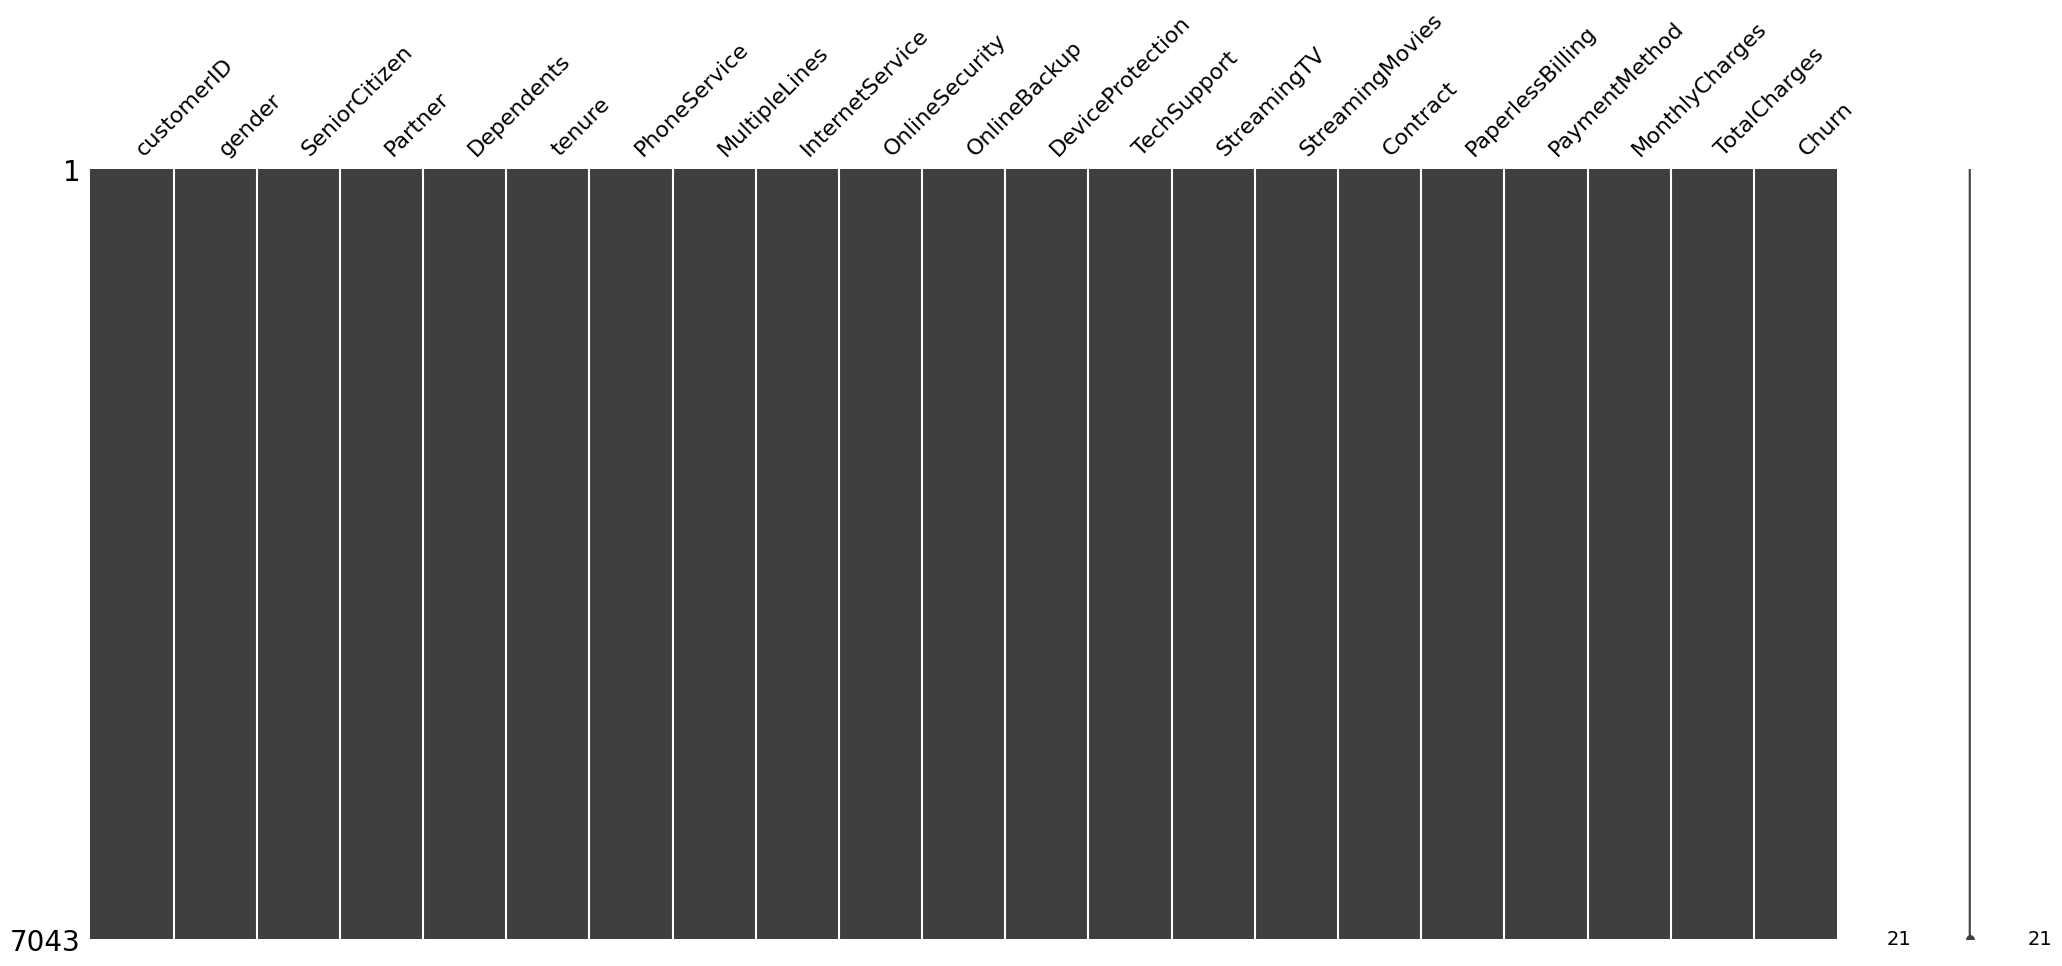

In [6]:
msno.matrix(df)

In [7]:
df.drop('customerID', axis=1, inplace=True)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:

df[["tenure", "MonthlyCharges"]][np.isnan(df['TotalCharges'])]

,tenure,MonthlyCharges
488,0,52.55
753,0,20.25
936,0,80.85
1082,0,25.75
1340,0,56.05
3331,0,19.85
3826,0,25.35
4380,0,20.00
5218,0,19.70
6670,0,73.35


In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index


Index([], dtype='int64')

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['PaymentMethod', 'InternetService', 'MultipleLines']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_transformed = pd.DataFrame(
    encoder.fit_transform(df[cols_to_encode]),
    columns=encoder.get_feature_names_out(cols_to_encode)
)
df.drop(columns=cols_to_encode, inplace=True)
df = pd.concat([df, df_transformed], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,Female,No,Yes,No,1.0,No,No,Yes,No,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Male,No,No,No,34.0,Yes,Yes,No,Yes,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Male,No,No,No,2.0,Yes,Yes,Yes,No,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Male,No,No,No,45.0,No,Yes,No,Yes,Yes,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Female,No,No,No,2.0,Yes,No,No,No,No,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,Female,No,Yes,No,1.0,No,No,Yes,No,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Male,No,No,No,34.0,Yes,Yes,No,Yes,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Male,No,No,No,2.0,Yes,Yes,Yes,No,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Male,No,No,No,45.0,No,Yes,No,Yes,Yes,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Female,No,No,No,2.0,Yes,No,No,No,No,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df_encoded = df.apply(lambda x: object_to_int(x))
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,Female,No,Yes,No,1.0,No,No,Yes,No,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Male,No,No,No,34.0,Yes,Yes,No,Yes,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Male,No,No,No,2.0,Yes,Yes,Yes,No,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Male,No,No,No,45.0,No,Yes,No,Yes,Yes,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Female,No,No,No,2.0,Yes,No,No,No,No,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
df.isnull().sum()

gender                                     11
SeniorCitizen                              11
Partner                                    11
Dependents                                 11
tenure                                     11
PhoneService                               11
OnlineSecurity                             11
OnlineBackup                               11
DeviceProtection                           11
TechSupport                                11
StreamingTV                                11
StreamingMovies                            11
Contract                                   11
PaperlessBilling                           11
MonthlyCharges                             11
TotalCharges                               11
Churn                                      11
PaymentMethod_Bank transfer (automatic)    11
PaymentMethod_Credit card (automatic)      11
PaymentMethod_Electronic check             11
PaymentMethod_Mailed check                 11
InternetService_DSL               

In [17]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 6754
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 non-nul

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print(df_encoded[numeric_features].head())

     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457


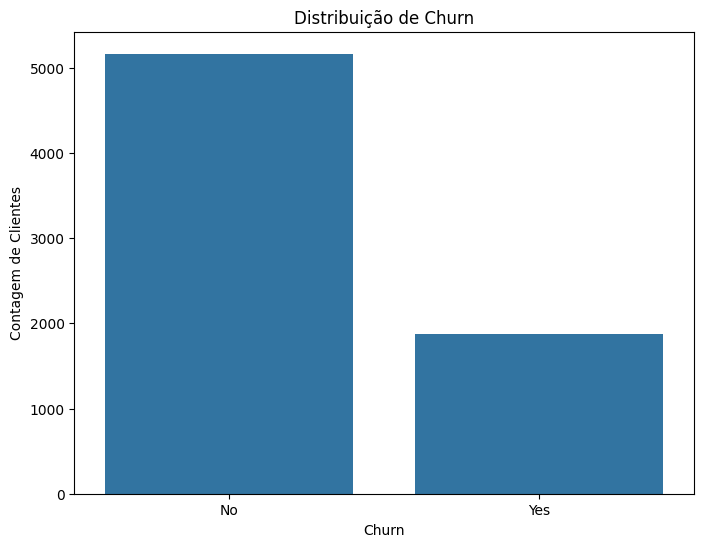

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem de Clientes')
plt.show()

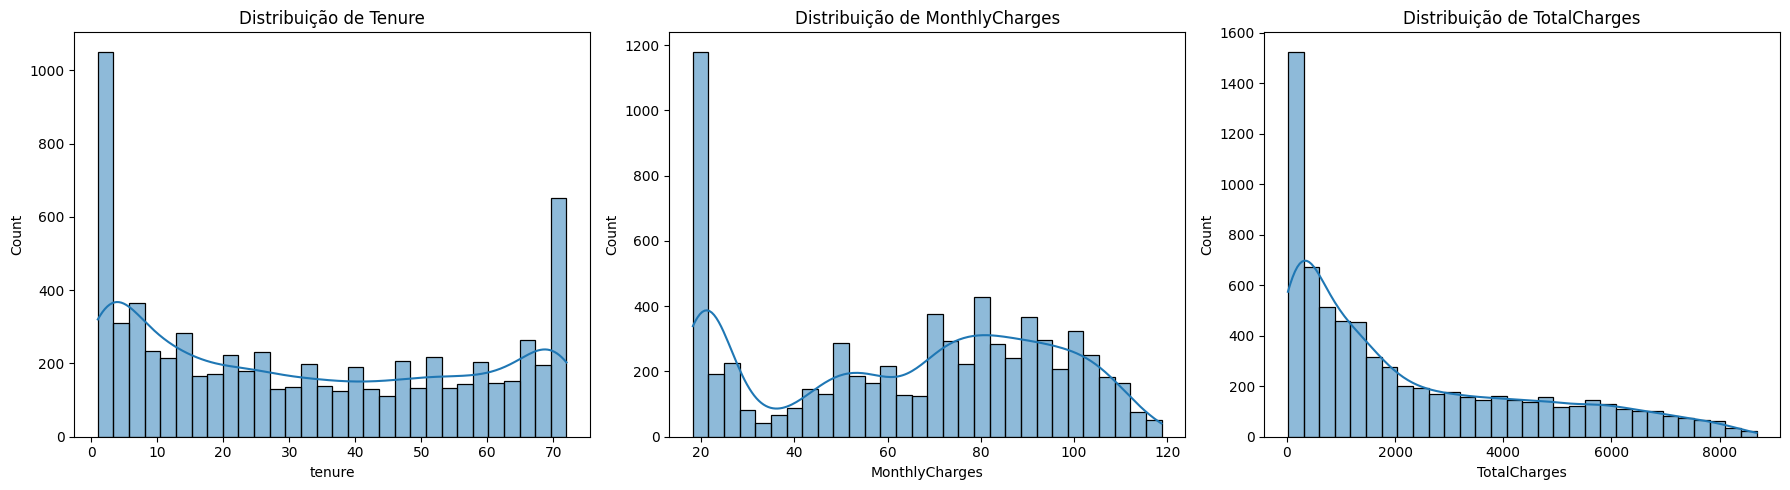

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribuição de Tenure')
sns.histplot(df['MonthlyCharges'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribuição de MonthlyCharges')
sns.histplot(df['TotalCharges'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribuição de TotalCharges')
plt.tight_layout()
plt.show()

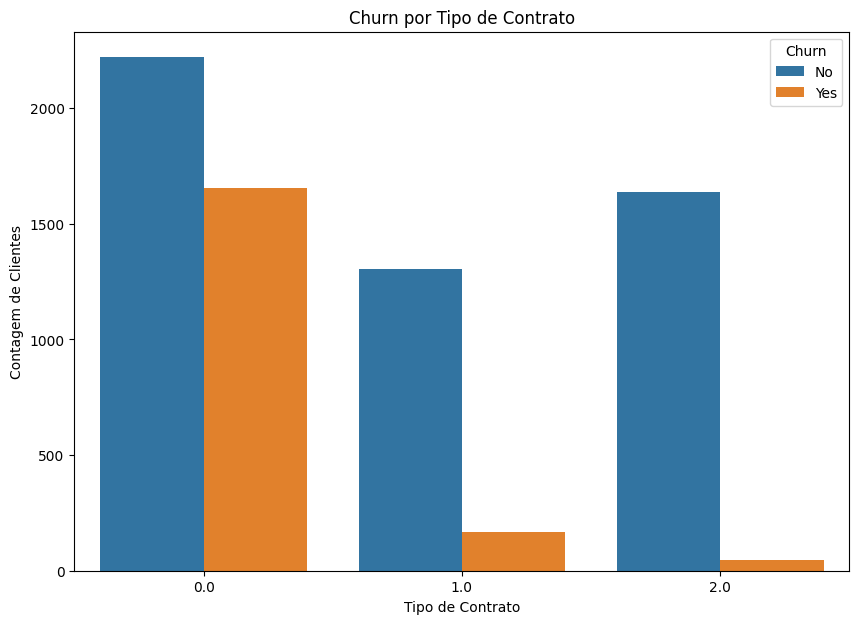

In [21]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem de Clientes')
plt.show()

In [22]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,-1.280248,0,0,2,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.064303,1,2,0,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,-1.239504,1,2,2,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0.512486,0,2,0,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


--- Resultados do Random Forest ---
Acurácia: 0.7892

Matriz de Confusão:
[[930 114   0]
 [183 179   0]
 [  0   0   3]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1044
           1       0.61      0.49      0.55       362
           2       1.00      1.00      1.00         3

    accuracy                           0.79      1409
   macro avg       0.82      0.80      0.80      1409
weighted avg       0.78      0.79      0.78      1409


Média da validação cruzada: 0.7932 (+/- 0.0176)


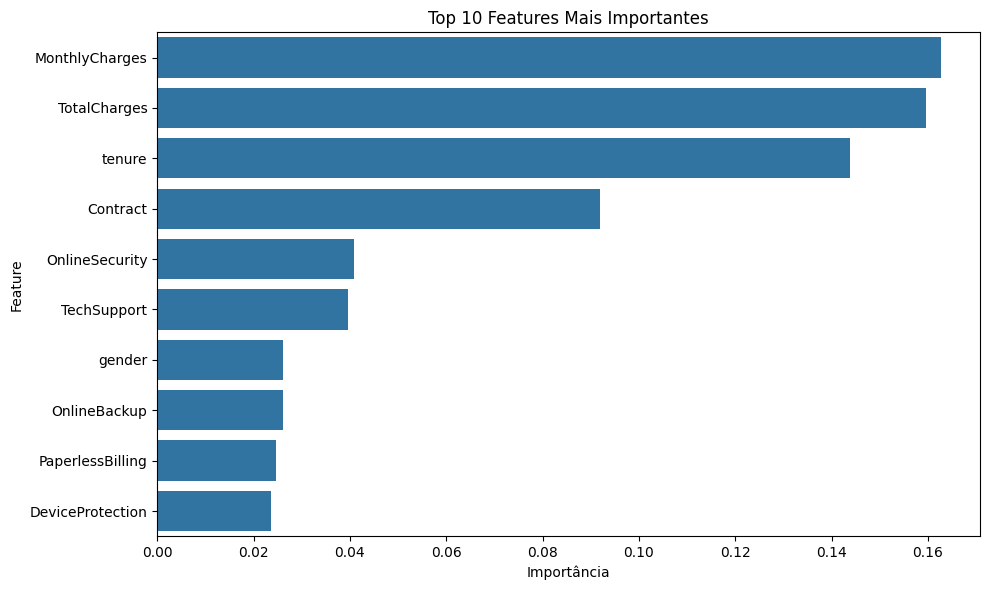

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)  # Todas as colunas exceto 'Churn'
y = df_encoded['Churn']  # Apenas a coluna 'Churn'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("--- Resultados do Random Forest ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"\nMédia da validação cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Features Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [24]:
## Gráficos de desempenho

### Matriz de Confusão - Regressão Logística

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

### Matriz de Confusão - Gaussian Naive Bayes

cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Gaussian Naive Bayes', fontsize=16)
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()


### Gráfico da Curva ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
auc_gnb = roc_auc_score(y_test, y_prob_gnb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Regressão Logística (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_gnb, tpr_gnb, color='green', label=f'Gaussian Naive Bayes (AUC = {auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Classificador Aleatório')

plt.title('Curva ROC', fontsize=16)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'y_pred_log_reg' is not defined